In [21]:
import pandas as pd
from os.path import join
from collections import defaultdict
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline

In [22]:
markers = ['>','*','<','o','^','X','D','8','h','d','>','*','<','o']
def matplotlib_setup():
    figure(figsize=(25,12))
    font = {'size'   : 42}
    plt.rc('font', **font)
    plt.rcParams["axes.linewidth"]  = 2.5    
    plt.grid(linewidth=3)

In [73]:
flowdet_metric = 'all'
clf_dir = 'c_forest_b_explicit_n_100_bootstrap_True_mf_auto_msl_3_ms_0.01'

In [74]:
def get_performance(root):
    fn = join(root,clf_dir,'recall','fold_test{}.csv'.format(flowdet_metric))
    df = pd.read_csv(fn)
    tpr = df[df['Label']=='Macro Average of Attacks']['Rc'].values[0]
    
    fn = join(root,clf_dir,'eval','fold_test{}.csv'.format(flowdet_metric))
    df = pd.read_csv(fn)
    rel_fpr = 100-df[df['Label']=='Benign']['Rc'].values[0]
    
    df = pd.read_csv(join(root,'observation_rate.csv'))
    benign_obsr_rate = df[df['Label']=='Benign']['Observation rate'].values[0]
    fpr = rel_fpr* (benign_obsr_rate/100.) # fpr = rel_fpr*(1/obsr)
    return tpr, fpr,rel_fpr 

In [75]:
roots = ['/data/juma/data/ids18/CSVs_r_1.0/SR_10/RPS_SI_10_l',
         '/data/juma/data/ids18/CSVs_r_1.0/SR_10/RPS_SI_10_l',
         '/data/juma/data/ids18/CSVs_r_1.0/SR_10/RPS_SI_10_l',
         '/data/juma/data/ids18/CSVs_r_1.0/SR_10/RPS_SI_10_l',
        ]
rps = defaultdict(list)
for root in roots:
    tpr, fpr, rel_fpr = get_performance(root)
    rps['tpr'].append(tpr)
    rps['fpr'].append(fpr)
    rps['rel_fpr'].append(rel_fpr)

In [76]:
roots = ['/data/juma/data/ids18/CSVs_r_1.0_m_0.05/SR_10/SFS_SI_9.77_l',
        '/data/juma/data/ids18/CSVs_r_1.0_m_0.2/SR_10/SFS_SI_9.77_l',
         '/data/juma/data/ids18/CSVs_r_1.0_m_0.6/SR_10/SFS_SI_9.77_l',
         '/data/juma/data/ids18/CSVs_r_1.0_m_1.0/SR_10/SFS_SI_9.77_l'
        ]

sfs = defaultdict(list)
for root in roots:
    tpr, fpr, rel_fpr = get_performance(root)
    sfs['tpr'].append(tpr)
    sfs['fpr'].append(fpr)
    sfs['rel_fpr'].append(rel_fpr)

In [77]:
roots = [    '/data/juma/data/ids18/CSVs_r_1.0_m_0.05/SR_10/FFS_(8,16,4)_l',
    '/data/juma/data/ids18/CSVs_r_1.0_m_0.2/SR_10/FFS_(8,16,4)_l',
    '/data/juma/data/ids18/CSVs_r_1.0_m_0.6/SR_10/FFS_(8,16,4)_l',
    '/data/juma/data/ids18/CSVs_r_1.0_m_1.0/SR_10/FFS_(8,16,4)_l'
        ]

ffs = defaultdict(list)
for root in roots:
    tpr, fpr, rel_fpr = get_performance(root)
    ffs['tpr'].append(tpr)
    ffs['fpr'].append(fpr)
    ffs['rel_fpr'].append(rel_fpr)

In [78]:
roots = [
        '/data/juma/data/ids18/CSVs_r_1.0_m_0.05/SR_10/SGS_e_0.00285_l',
         '/data/juma/data/ids18/CSVs_r_1.0_m_0.2/SR_10/SGS_e_0.0108_l',
        #'/data/juma/data/ids18/CSVs_r_1.0_m_0.2/SR_10/SGS_e_0.0107',
        '/data/juma/data/ids18/CSVs_r_1.0_m_0.6/SR_10/SGS_e_0.0305_l',
        '/data/juma/data/ids18/CSVs_r_1.0_m_1.0/SR_10/SGS_e_0.05_l',
]

sgs = defaultdict(list)
for root in roots:
    tpr, fpr, rel_fpr = get_performance(root)
    sgs['tpr'].append(tpr)
    sgs['fpr'].append(fpr)
    sgs['rel_fpr'].append(rel_fpr)

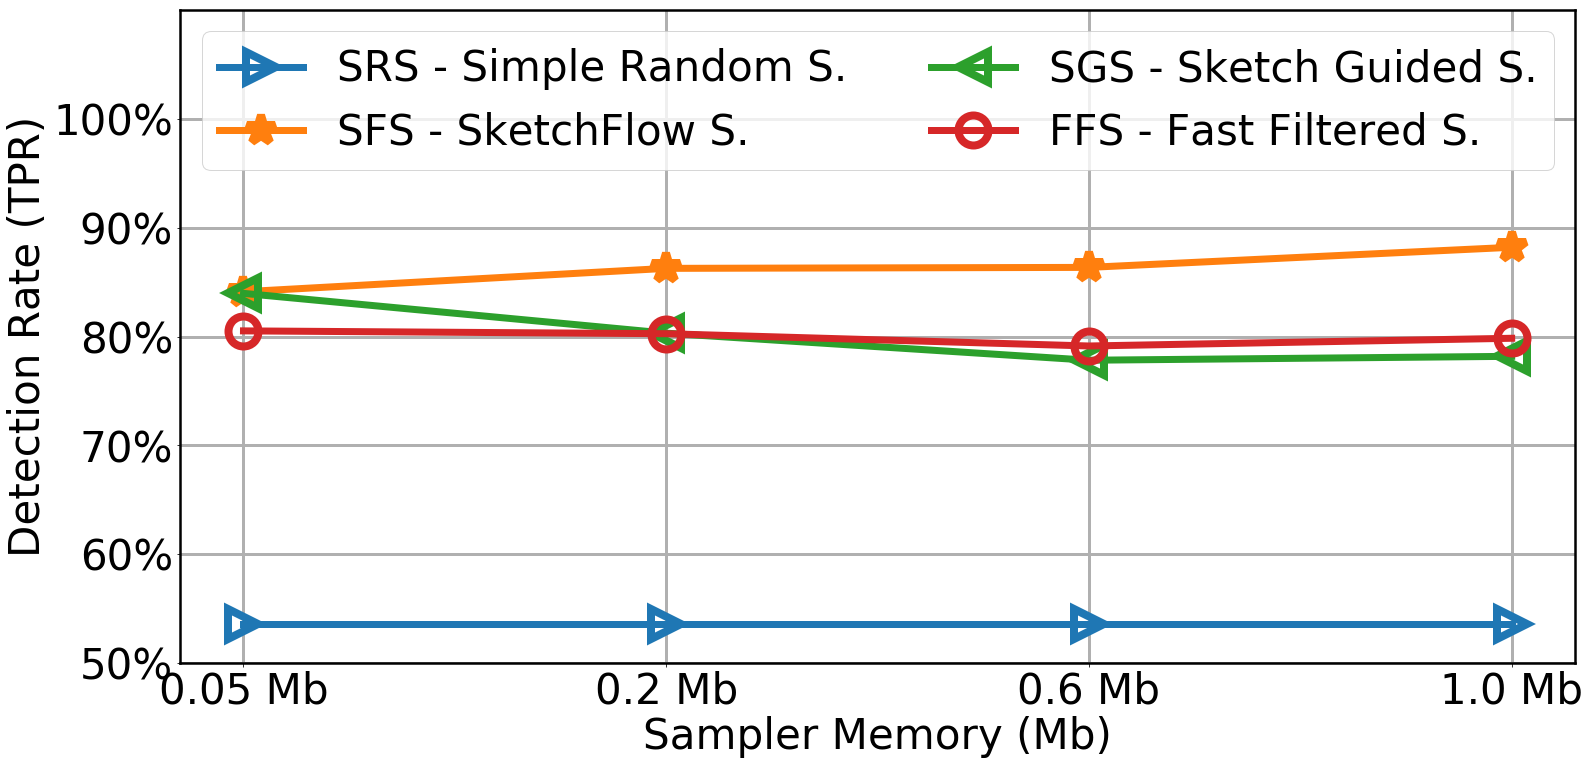

In [79]:
matplotlib_setup()
plt.plot(rps['tpr'],label = 'SRS - Simple Random S.',linewidth=7,marker=markers[0],markersize=30,markeredgewidth=8,markerfacecolor='none')
plt.plot(sfs['tpr'],label = 'SFS - SketchFlow S.',linewidth=7,marker=markers[1],markersize=30,markeredgewidth=8,markerfacecolor='none')
plt.plot(sgs['tpr'],label = 'SGS - Sketch Guided S.',linewidth=7,marker=markers[2],markersize=30,markeredgewidth=8,markerfacecolor='none')
plt.plot(ffs['tpr'],label = 'FFS - Fast Filtered S.',linewidth=7,marker=markers[3],markersize=30,markeredgewidth=8,markerfacecolor='none')
plt.legend(ncol=2)
plt.ylabel('Detection Rate (TPR)')
plt.xlabel("Sampler Memory (Mb)")
plt.xticks(np.arange(4),['0.05 Mb','0.2 Mb','0.6 Mb','1.0 Mb'])
plt.yticks(np.arange(50,110,10),[str(i)+'%' for i in np.arange(50,110,10)])
plt.ylim([50,110])
plt.savefig('/data/juma/data/ids18/tpr_across_sampler_memory_{}.png'.format(flowdet_metric))
plt.show()

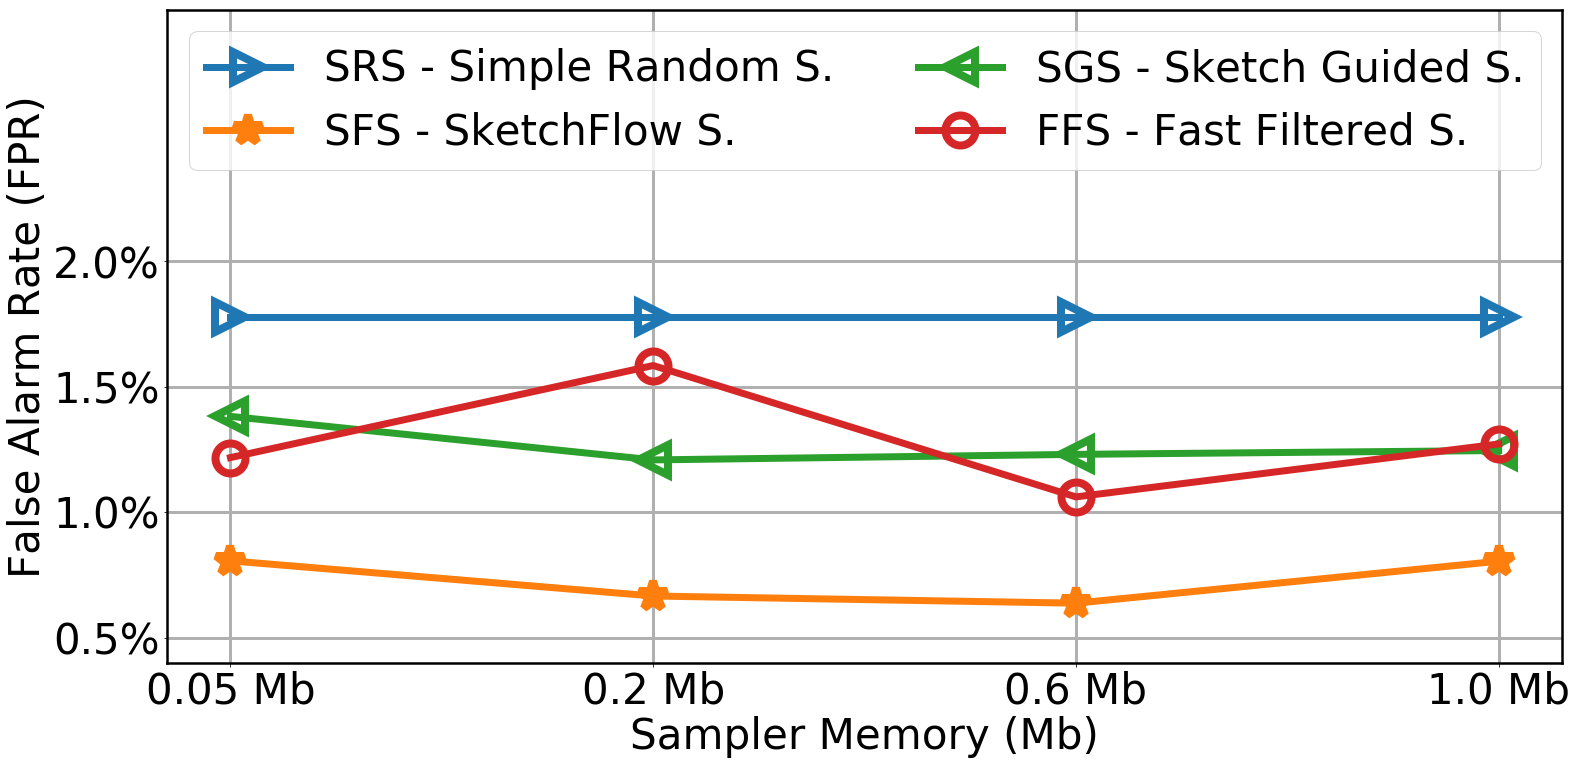

In [80]:
matplotlib_setup()
plt.plot(rps['fpr'],label = 'SRS - Simple Random S.',linewidth=7,marker=markers[0],markersize=30,markeredgewidth=8,markerfacecolor='none')
plt.plot(sfs['fpr'],label = 'SFS - SketchFlow S.',linewidth=7,marker=markers[1],markersize=30,markeredgewidth=8,markerfacecolor='none')
plt.plot(sgs['fpr'],label = 'SGS - Sketch Guided S.',linewidth=7,marker=markers[2],markersize=30,markeredgewidth=8,markerfacecolor='none')
plt.plot(ffs['fpr'],label = 'FFS - Fast Filtered S.',linewidth=7,marker=markers[3],markersize=30,markeredgewidth=8,markerfacecolor='none')
plt.legend(ncol=2)
plt.ylabel('False Alarm Rate (FPR)')
plt.xlabel("Sampler Memory (Mb)")
plt.yticks(np.arange(0.5,2.5,0.5),[str(i)+'%' for i in np.arange(0.5,2.5,0.5)])
plt.ylim([.40,3])
plt.xticks(np.arange(4),['0.05 Mb','0.2 Mb','0.6 Mb','1.0 Mb'])
plt.savefig('/data/juma/data/ids18/fpr_across_sampler_memory_{}.png'.format(flowdet_metric))
plt.show()

all


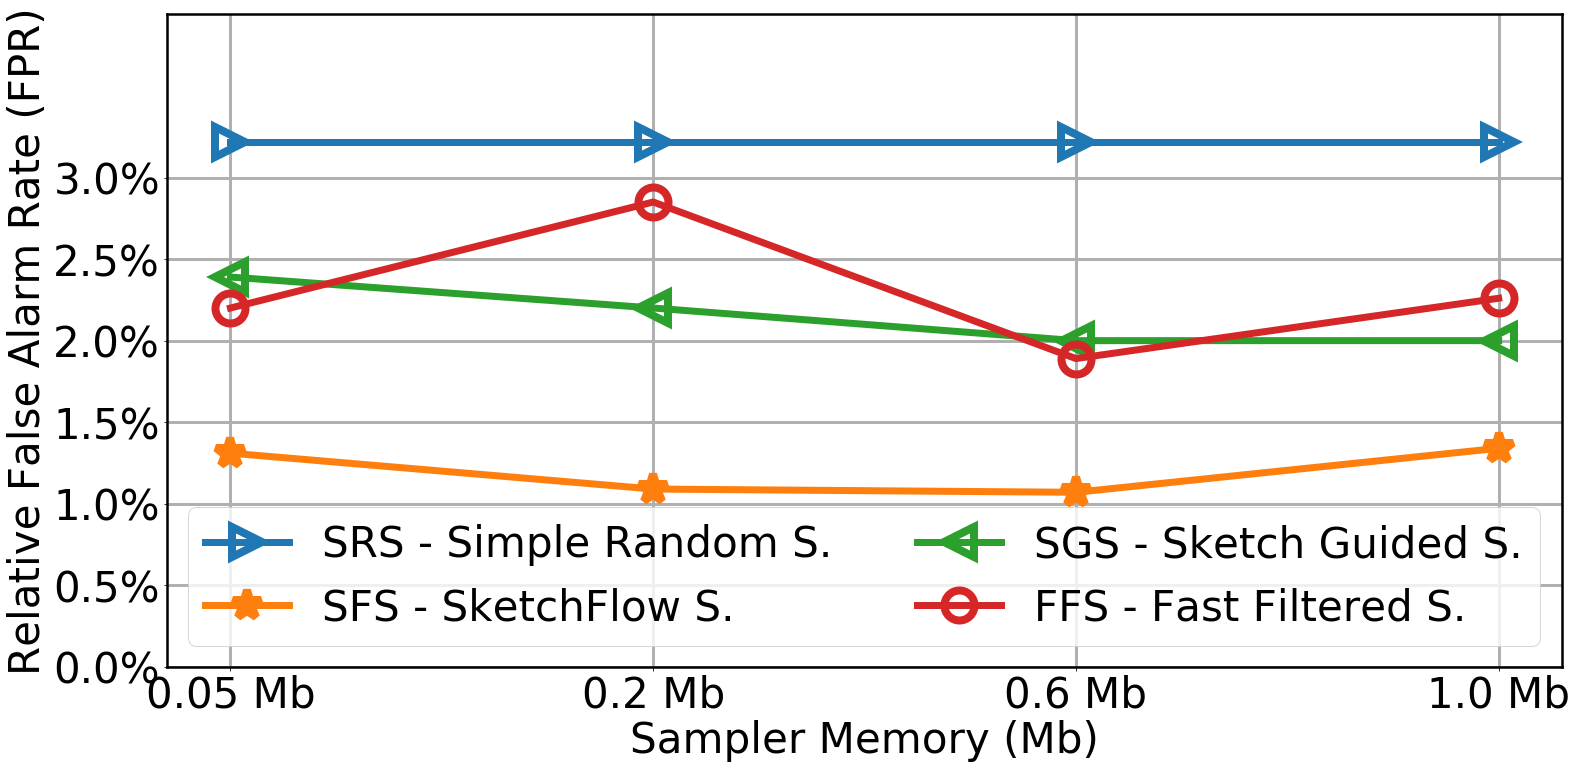

In [81]:
matplotlib_setup()
plt.plot(rps['rel_fpr'],label = 'SRS - Simple Random S.',linewidth=7,marker=markers[0],markersize=30,markeredgewidth=8,markerfacecolor='none')
plt.plot(sfs['rel_fpr'],label = 'SFS - SketchFlow S.',linewidth=7,marker=markers[1],markersize=30,markeredgewidth=8,markerfacecolor='none')
plt.plot(sgs['rel_fpr'],label = 'SGS - Sketch Guided S.',linewidth=7,marker=markers[2],markersize=30,markeredgewidth=8,markerfacecolor='none')
plt.plot(ffs['rel_fpr'],label = 'FFS - Fast Filtered S.',linewidth=7,marker=markers[3],markersize=30,markeredgewidth=8,markerfacecolor='none')
plt.legend(ncol=2)
plt.ylabel('Relative False Alarm Rate (FPR)')
plt.xlabel("Sampler Memory (Mb)")
plt.yticks(np.arange(0.,3.5,0.5),[str(i)+'%' for i in np.arange(0.,3.5,0.5)])
plt.ylim([.0,4])
plt.xticks(np.arange(4),['0.05 Mb','0.2 Mb','0.6 Mb','1.0 Mb'])
plt.savefig('/data/juma/data/ids18/fpr_relative_across_sampler_memory_{}.png'.format(flowdet_metric))
print(flowdet_metric)
plt.show()